In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

plt.rc('figure', figsize = (20, 8))

In [4]:
def normalizacao(df):
    from sklearn import preprocessing
    np_scaled = preprocessing.scale(df)
    df_normalized = pd.DataFrame(np_scaled, columns = df.columns)
    return df_normalized

In [7]:
def discretizacao_das_medias(df):
    df.loc[df.Media_Final<5.0, 'Media_Final'] = 0
    df.loc[df.Media_Final>=5.0, 'Media_Final'] = 1
    df['Media_Final'] = df.Media_Final.astype(int)
    return df

In [ ]:
def subamostragem_balanceamento(df):
    g = df.groupby('Media_Final')
    df = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
    return df

In [21]:
df = pd.read_csv('data/session3.csv')
df.loc[:, df.columns != 'Media_Final'] = normalizacao(df.loc[:, df.columns != 'Media_Final'])
df = discretizacao_das_medias(df)
df.head()

,attempts,comments,blank_line,lloc,sloc,single_comments,system_access,exam_grade_codebench,difficult,delete_average,...,submission_per_exercice,sucess_average,test_average,exercices_list_grade,exercices_list_grade_check_plagiarism,copy_past_proportion,sintaxe_error,IDE_usage,keystroke_latency,Media_Final
0,-0.057293,-0.314933,-0.339140,0.002727,-0.026467,-0.310231,2.191555,1.501286,-1.113019,-0.079093,...,0.163582,0.140087,-0.298199,0.671344,1.176323,-0.129364,-0.002262,-0.002542,0.524059,1
1,0.314589,-0.321891,0.555079,0.423888,0.378353,-0.317618,0.099887,-0.591623,0.029113,0.380139,...,0.117493,0.140087,0.346478,0.671344,0.292288,-0.125731,-0.843827,0.442080,0.685042,0
2,0.314589,-0.321891,0.555079,0.423888,0.378353,-0.317618,-1.130506,-1.255840,0.926502,-0.800742,...,-0.300507,-0.993536,-0.771065,-1.984898,-1.478438,-0.132266,1.992557,-1.023294,-1.662622,0
3,0.046008,-0.342767,-0.335722,-0.108619,-0.136758,-0.339780,-0.515310,1.087717,0.702154,0.694384,...,-0.160547,-0.615661,0.028396,0.376501,0.881645,-0.132048,-0.376291,0.686309,0.859440,1
4,-0.528343,-0.153150,-0.492922,-0.460118,-0.455334,-0.138479,0.099887,-1.005192,-1.337366,-0.557787,...,-0.216982,1.308061,-0.521862,0.671344,-0.299724,-0.127738,-0.812658,-0.741491,0.081357,0


## Contagem de classes

In [22]:
g = df.groupby('Media_Final')
g.size()
#Caso queira realizar subamostragem, basta executar o comando abaixo:
#df = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))

Media_Final
0    162
1    210
dtype: int64

## Separando os atributos das classes

In [23]:
X, y = df.drop('Media_Final', axis=1).values, df['Media_Final'].values

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.feature_selection import RFE

#pipeline = make_pipeline(
#            RFE(estimator=ExtraTreesClassifier(criterion="gini", n_estimators=100), step=0.5),
#            RandomForestClassifier(max_features=0.9500000000000001, min_samples_leaf=20, n_estimators=500)
#        )

pipeline = ExtraTreesClassifier(bootstrap=True, criterion="entropy", max_features=0.45, min_samples_leaf=7, min_samples_split=19)

In [57]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(pipeline, X, y, scoring='accuracy', cv=10)

In [58]:
print('Acc.: %.2f [+/-%.2f]' % (cv_score.mean(), cv_score.std()))

Acc.: 0.73 [+/-0.08]


## Matriz de confusão

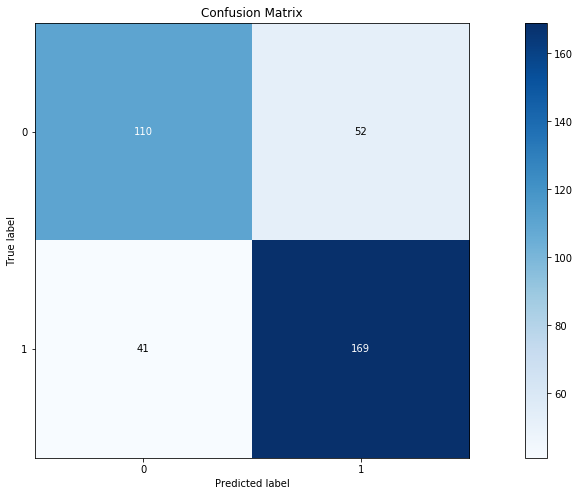

In [59]:
import scikitplot as skplt

from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(bootstrap=True, criterion="entropy", max_features=0.45, min_samples_leaf=7, min_samples_split=19)

skplt.classifiers.plot_confusion_matrix(clf, X, y, normalize=False, title='Confusion Matrix', cv=10)

## Removendo Outliers

In [77]:
df.describe().round(2)

,attempts,comments,blank_line,lloc,sloc,single_comments,system_access,exam_grade_codebench,difficult,delete_average,...,submission_per_exercice,sucess_average,test_average,exercices_list_grade,exercices_list_grade_check_plagiarism,copy_past_proportion,sintaxe_error,IDE_usage,keystroke_latency,Media_Final
count,372.00,372.00,372.00,372.00,372.00,372.00,372.00,372.00,372.00,372.00,...,372.00,372.00,372.00,372.00,372.00,372.00,372.00,372.00,372.00,372.00
mean,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,...,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.56
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.50
min,-0.84,-0.34,-0.52,-0.68,-0.69,-0.34,-1.25,-1.26,-3.15,-0.80,...,-0.30,-0.99,-0.77,-1.98,-1.48,-0.13,-1.12,-1.02,-1.66,0.00
25%,-0.51,-0.34,-0.46,-0.48,-0.48,-0.34,-0.76,-1.01,-0.66,-0.69,...,-0.28,-0.99,-0.69,-0.53,-0.89,-0.13,-0.75,-0.80,-0.48,0.00
50%,-0.28,-0.33,-0.30,-0.29,-0.29,-0.33,-0.27,0.25,0.25,-0.27,...,-0.20,-0.24,-0.35,0.67,-0.00,-0.13,-0.35,-0.17,0.19,1.00
75%,0.19,-0.15,0.05,0.16,0.17,-0.13,0.47,0.66,0.93,0.25,...,-0.04,0.52,0.27,0.67,1.03,-0.13,0.37,0.44,0.69,1.00
max,10.11,9.42,12.34,11.33,11.19,10.03,4.90,1.50,0.93,7.30,...,12.33,2.44,5.00,0.67,1.18,13.65,1.99,6.30,3.03,1.00


# <font color=red>TODO </font>

* Remover outiliers por grupo usando IQR